# 21. Model Monitoring and Performance Tracking | مراقبة النموذج وتتبع الأداء

## 📚 Learning Objectives

By completing this notebook, you will:
- Monitor deployed models in production environments
- Track model performance metrics over time
- Detect model drift (data drift, concept drift)
- Detect model degradation and performance issues
- Implement alerting systems for model problems

## 🔗 Prerequisites

- ✅ Example 20: Deployment (need deployed models to monitor)
- ✅ Example 12: Model Evaluation (understand performance metrics)
- ✅ Understanding of production systems

---

## Official Structure Reference

This notebook supports **Course 05, Unit 4** requirements from `DETAILED_UNIT_DESCRIPTIONS.md`.

---

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Example 20: Deployment** - You need deployed models!
- ✅ **Example 12: Model Evaluation** - Understand performance metrics!
- ✅ **Understanding of production**: What happens after deployment?

**If you haven't completed these**, you might struggle with:
- Understanding why monitoring is needed
- Knowing what to monitor
- Understanding drift detection

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is part of Unit 5: Scaling and Production**

**Why model monitoring?**
- **After** deploying models, we need to monitor them
- **Models degrade** over time (data changes, performance drops)
- **Monitoring** detects problems before they impact users

**Builds on**: 
- 📓 Example 20: Deployment (deployed models)
- 📓 Example 12: Model Evaluation (performance metrics)

**Leads to**: 
- 📓 Production ML systems
- 📓 Model maintenance and updates

**Why this order?**
1. Monitoring comes after deployment (monitor what's deployed)
2. Essential for production ML systems
3. Ensures models stay accurate over time

---

## The Story: Maintaining Your Car | القصة: صيانة سيارتك

Imagine you own a car (deployed model). **After** buying it, you maintain it - check oil, monitor performance, fix issues. **After** regular monitoring, your car stays reliable!

Same with ML models: **After** deploying, we monitor - track performance, detect drift, fix issues. **After** regular monitoring, models stay accurate!

---

## Why Model Monitoring Matters | لماذا يهم مراقبة النموذج

Model monitoring is essential because:
- **Model Degradation**: Models get worse over time
- **Data Drift**: Real-world data changes
- **Early Detection**: Catch problems before they impact users
- **Production Quality**: Ensure models stay accurate

**Common Student Questions:**
- **Q: Why do models degrade?**
  - Answer: Data changes, world changes, models become outdated
  - Example: Customer behavior changes, model accuracy drops
  - Solution: Monitor and retrain when needed
  
- **Q: What should I monitor?**
  - Answer: Accuracy, prediction distribution, input data distribution
  - Example: Track accuracy over time, detect when it drops
  - Tip: Monitor both model performance and input data

---

## Introduction

**Model monitoring** tracks deployed models to ensure they maintain performance over time. It detects degradation, drift, and issues before they impact users, ensuring production ML systems stay reliable.


# 21. Model Monitoring and Performance Tracking | مراقبة النموذج وتتبع الأداء

**All concepts are explained in the code comments below - you can learn everything from this notebook alone!**

---

## 🔗 After Deployment | بعد النشر

**Models don't stay perfect forever!**
- Models degrade over time (data drift, concept drift)
- Performance can drop without warning
- We need to monitor and track performance

**This notebook teaches monitoring!**
- We'll learn **performance tracking** - monitor metrics over time
- We'll learn **drift detection** - detect when models degrade
- We'll learn **alerting** - get notified of issues
- We'll learn **logging** - track predictions and errors

**This ensures models stay reliable in production!**

---

## Learning Objectives | أهداف التعلم
1. Track model performance metrics over time
2. Detect data drift and concept drift
3. Implement alerting for model issues
4. Log predictions and monitor model health

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

print("✅ Libraries imported!")
print("\n📚 This notebook covers:")
print("   - Performance tracking")
print("   - Drift detection")
print("   - Alerting systems")
print("   - Model health monitoring")

✅ Libraries imported!

📚 This notebook covers:
   - Performance tracking
   - Drift detection
   - Alerting systems
   - Model health monitoring


In [2]:
# Step 2: Simulate performance metrics over time
dates = pd.date_range(start='2024-01-01', periods=30, freq='D')

# Simulate accuracy degrading over time (model drift)
baseline_accuracy = 0.92
drift = np.linspace(0, 0.15, 30)  # Gradual degradation
noise = np.random.normal(0, 0.02, 30)
accuracy = baseline_accuracy - drift + noise
accuracy = np.clip(accuracy, 0, 1)  # Keep in [0, 1] range

metrics_df = pd.DataFrame({
    'date': dates,
    'accuracy': accuracy,
    'predictions_count': np.random.randint(1000, 5000, 30)
})

print("Performance Metrics Over Time:")
print(metrics_df.head(10))

Performance Metrics Over Time:
        date  accuracy  predictions_count
0 2024-01-01  0.928753               4450
1 2024-01-02  0.937352               1894
2 2024-01-03  0.909622               2435
3 2024-01-04  0.922663               1449
4 2024-01-05  0.880574               2146
5 2024-01-06  0.905808               2426
6 2024-01-07  0.864614               3706
7 2024-01-08  0.871866               2721
8 2024-01-09  0.902672               3069
9 2024-01-10  0.857225               4219


1. Performance Tracking | تتبع الأداء


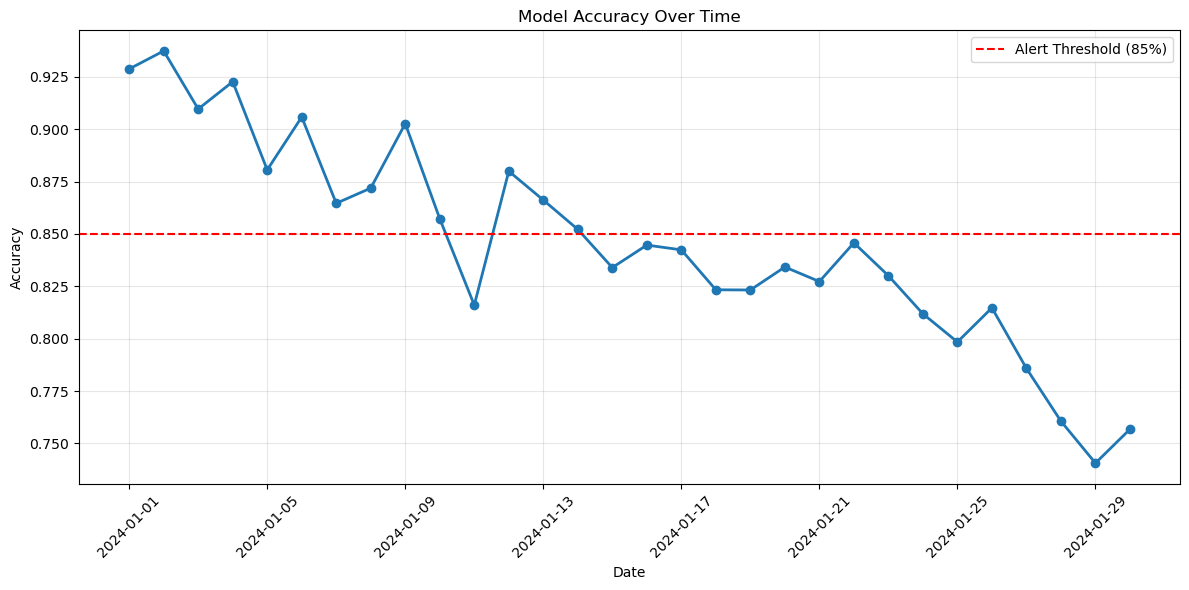


✅ Performance trend visualized!
Current accuracy: 0.757
Baseline accuracy: 0.920
Degradation: 16.3%


In [3]:
# Step 3: Visualize Performance Trend
print("=" * 70)
print("1. Performance Tracking | تتبع الأداء")
print("=" * 70)

plt.figure(figsize=(12, 6))
plt.plot(metrics_df['date'], metrics_df['accuracy'], marker='o', linewidth=2)
plt.axhline(y=0.85, color='r', linestyle='--', label='Alert Threshold (85%)')
plt.title('Model Accuracy Over Time')
plt.xlabel('Date')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n✅ Performance trend visualized!")
print(f"Current accuracy: {metrics_df['accuracy'].iloc[-1]:.3f}")
print(f"Baseline accuracy: {baseline_accuracy:.3f}")
print(f"Degradation: {(baseline_accuracy - metrics_df['accuracy'].iloc[-1])*100:.1f}%")

In [4]:
# Step 4: Drift Detection
print("\n" + "=" * 70)
print("2. Drift Detection | اكتشاف الانحراف")
print("=" * 70)

threshold = 0.85
below_threshold = metrics_df[metrics_df['accuracy'] < threshold]

if len(below_threshold) > 0:
    print(f"⚠️  ALERT: Model accuracy below threshold on {len(below_threshold)} days!")
    print("\nDates with low accuracy:")
    for idx, row in below_threshold.iterrows():
        print(f"  {row['date'].strftime('%Y-%m-%d')}: {row['accuracy']:.3f}")
else:
    print("✅ No drift detected - model performance is stable")

print("\n💡 Tip: Set up automated alerts when metrics drop below thresholds!")


2. Drift Detection | اكتشاف الانحراف
⚠️  ALERT: Model accuracy below threshold on 17 days!

Dates with low accuracy:
  2024-01-11: 0.816
  2024-01-15: 0.834
  2024-01-16: 0.845
  2024-01-17: 0.842
  2024-01-18: 0.823
  2024-01-19: 0.823
  2024-01-20: 0.834
  2024-01-21: 0.827
  2024-01-22: 0.846
  2024-01-23: 0.830
  2024-01-24: 0.812
  2024-01-25: 0.798
  2024-01-26: 0.815
  2024-01-27: 0.786
  2024-01-28: 0.761
  2024-01-29: 0.741
  2024-01-30: 0.757

💡 Tip: Set up automated alerts when metrics drop below thresholds!
